# Chapter: Introduction to CNNs


# Topic: MNIST classification

In [5]:
# packages
import numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

from numpy.random import seed
seed(2)
tf.random.set_seed(2)

training input data shape:  (60000, 28, 28)
test input data shape:  (10000, 28, 28)
training output data shape:  (60000,)
test output data shape:  (10000,)


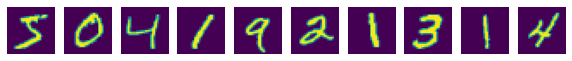

In [6]:
# load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('training input data shape: ', x_train.shape), print('test input data shape: ', x_test.shape)
print('training output data shape: ', y_train.shape), print('test output data shape: ', y_test.shape)

# reshape each image's 2D data into a 3D shape with 1 channel (i.e., of shape 28 X 28 X 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

fig, ax = plt.subplots(1, 10, figsize=(10,2))
for i in range(10):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')

plt.show()

In [7]:
# scale pixel values to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [8]:
# define CNN
lenet5 = keras.Sequential([
    keras.layers.Conv2D(6, (5,5), padding='same', input_shape=[28, 28, 1], activation='tanh'),
    keras.layers.AveragePooling2D((2,2)),

    keras.layers.Conv2D(16, (5,5), padding='valid', activation='tanh'),
    keras.layers.AveragePooling2D((2,2)),

    keras.layers.Conv2D(120, (5,5), padding='valid', activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax') # original LeNet-5 had used RBF activation
])

lenet5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lenet5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [9]:
# fit model
history = lenet5.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 15ms/step - loss: 0.3659 - accuracy: 0.8905 - val_loss: 0.1438 - val_accuracy: 0.9552
Epoch 2/15
422/422 [==============================] - 6s 15ms/step - loss: 0.1352 - accuracy: 0.9596 - val_loss: 0.0940 - val_accuracy: 0.9732
Epoch 3/15
422/422 [==============================] - 7s 15ms/step - loss: 0.0868 - accuracy: 0.9729 - val_loss: 0.0649 - val_accuracy: 0.9810
Epoch 4/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.0711 - val_accuracy: 0.9795
Epoch 5/15
422/422 [==============================] - 7s 15ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.0534 - val_accuracy: 0.9852
Epoch 6/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0499 - val_accuracy: 0.9855
Epoch 7/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0491 - val_accuracy: 0.9867

313/313 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9869


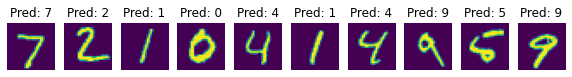

In [10]:
# evaluate model
lenet5.evaluate(x_test, y_test)

fig, ax = plt.subplots(1, 10, figsize=(10,2))
for i in range(10): # first 10 test images
    img = x_test[i]
    softmax_probabilities = lenet5.predict(np.expand_dims(img, 0)) # adding the batch dimenson before predicting 
    label_pred = np.argmax(softmax_probabilities)
    
    ax[i].imshow(img)
    ax[i].set_title(f'Pred: {label_pred}'), ax[i].axis('off')
plt.show()